# **NLP-Email Classification (spam or ham) With Pytorch**

**about the Project:<br>**
in this project we are working on a classification technique,we will be building a model to classify emails to Spam or Ham ,to do so we will using a Technique called Transfer Learning - a process that consists on customizing BERT knowledge to perfom well on Domain-specific data  this saves time and computational effort compared to training a model from scratch .
  so for this project we will use a classical machine learning model Logistic regression as our baseline model ,after that we will use a hugging face pre-trained model called **BERT** as our main model for the transfer learning.
https://www.geeksforgeeks.org/nlp/transfer-learning-and-fine-tuning-in-nlp
**Project workflow :<br>** 
1. Importing the packages and Libraries .
2. Cleaning the data for the baseline model .
3. training evaluating our baseline model .
4. buiding torch classes for text processing .
5. building the model architecture .
6. building the model Training loop .
7. testing and evaluating of the model.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot 

from transformers import BertTokenizer , BertForSequenceClassification
import gradio 
import torch 
from torch.optim import AdamW
from torch.utils.data import DataLoader , TensorDataset
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

import warnings
warnings.filterwarnings('ignore')


2025-10-16 21:09:18.869616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760648959.085765      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760648959.152288      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Reading the data

In [2]:
data  = pd.read_csv("/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Exploring and Cleaning the data

<Axes: >

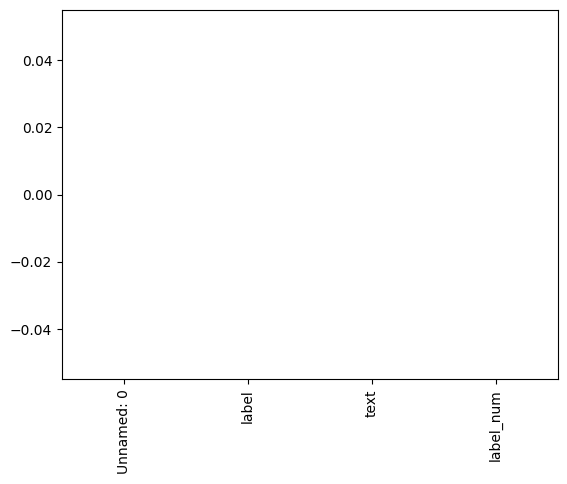

In [3]:
(data.isna().sum() / data.shape[0]).plot(kind='bar')

in this project we will only use two columns the raw_text and the label (target variable)

In [4]:
df = data[['text','label']]
df.head(5)

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\r\nthis deal is t...,ham


In [5]:
df.dtypes

text     object
label    object
dtype: object

In [6]:
import random
for i in range(1,8):
    idx = random.choice([1,df.shape[0]-1])
    print(df.iloc[idx,0])
    print('--'*40)

Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls
--------------------------------------------------------------------------------
Subject: important online banking alert
dear valued citizensr bank member ,
due to concerns , for the safety and integrity of the online banking community we have issued the following warning message .
it has come to our attention that your citizensr bank account information needs to be updated as part of our continuing commitment to protect your account and to reduce the instance of fraud on our website . if you could please take 5 - 10 minutes out of your online experience and renew your records you will not run into any future problems with the online service . however , failure to confirm your records may result in your account suspension .
once you have confirmed your account records your internet banking service will not be interrupted and will continue as normal .
to confirm your bank account records plea

Contain at least one uppercase letter

Contain at least one lowercase letter

Contain at least one digit

Contain at least one special character (@#$%^&*!_)

Be at least 8 characters long

In [7]:
#testing
text = "Confirm your email jackjones@gmail.com to receive €916 right away: https://notify.app/track/66025196-5183"
import re 
pattern = r'([\w\.-]+@\w+\.\w{1,3})'
print(re.findall(pattern,text))
pattern_2 = r'(https?://[^\s]+)'
print(re.findall(pattern_2,text))
pattern_3 = r"([\$€]\d+)"
print(re.findall(pattern_3,text))

['jackjones@gmail.com']
['https://notify.app/track/66025196-5183']
['€916']


In [8]:
def Clean_text(text):
    text = re.sub(r'[\w.-]+@\w+\.\{1,3}'," ",text)
    text = re.sub(r'https?://[^\s]+'," ",text)
    text = re.sub(r"[\W\d]+"," ",text)
    text = re.sub(r"[\$€]\d+"," ",text).lower().strip()
    return text

df['text'] = df['text'].apply(lambda x :Clean_text(x) )


In [9]:
for i in range(1,8):
    print('--'*30)
    print(df.iloc[i,0])

------------------------------------------------------------
subject hpl nom for january see attached file hplnol xls hplnol xls
------------------------------------------------------------
subject neon retreat ho ho ho we re around to that most wonderful time of the year neon leaders retreat time i know that this time of year is extremely hectic and that it s tough to think about anything past the holidays but life does go on past the week of december through january and that s what i d like you to think about for a minute on the calender that i handed out at the beginning of the fall semester the retreat was scheduled for the weekend of january but because of a youth ministers conference that brad and dustin are connected with that week we re going to change the date to the following weekend january now comes the part you need to think about i think we all agree that it s important for us to get together and have some time to recharge our batteries before we get to far into the sprin

In [10]:
import random
for i in range(1,8):
    idx = random.choice([1,df.shape[0]-1])
    print(df.iloc[idx,0])
    print('--'*40)

subject hpl nom for january see attached file hplnol xls hplnol xls
--------------------------------------------------------------------------------
subject important online banking alert dear valued citizensr bank member due to concerns for the safety and integrity of the online banking community we have issued the following warning message it has come to our attention that your citizensr bank account information needs to be updated as part of our continuing commitment to protect your account and to reduce the instance of fraud on our website if you could please take minutes out of your online experience and renew your records you will not run into any future problems with the online service however failure to confirm your records may result in your account suspension once you have confirmed your account records your internet banking service will not be interrupted and will continue as normal to confirm your bank account records please click here note this e mail was sent on behalf of

In [11]:
df['text'] = df['text'].str.replace("subject","") 
df['text'] = df['text'].str.replace("_","")

In [12]:
df['word_count'] = df['text'].str.split().str.len()

Text(0.5, 1.0, 'number of words in emails')

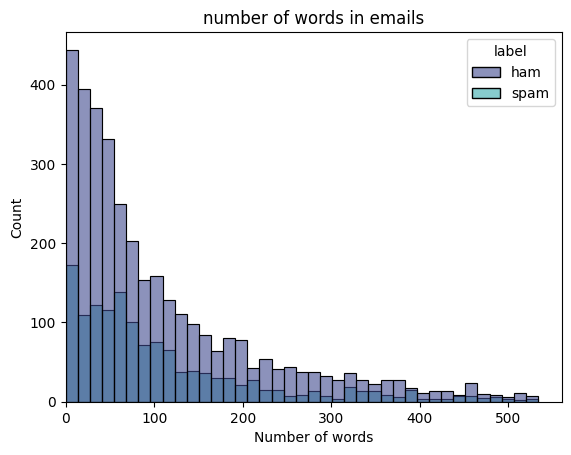

In [13]:
import matplotlib.pyplot as plt
sns.histplot(x=df['word_count'],hue=df['label'],palette='mako',binrange=[0,np.percentile(df['word_count'],95)],alpha=0.6)
plt.xlim(0)
plt.xlabel("Number of words")
plt.title('number of words in emails')

#### **<br>Observation:<br>**
the plot above shows the distribution of the number of word of emails , the plot is devide to :
* Ham  : Legit emails<br>
* Spam : Fake emails<br>
from the plot we can see that the distribution of the number of words per email is right skewed this suggests that most of the emails have less than 100 word and less often to recieve an email with 400 or 500 word .


In [14]:
# let's check the most frequente words 
from collections import Counter
spam_words = " ".join(df[df['label']=="spam"]["text"])
# seting stop words 
stop_words = set(stopwords.words("english"))
spam_words = [word for word in spam_words.split() if word not in stop_words ]
spam_word_freq = Counter(spam_words)

ham_words = " ".join(df[df['label']=="ham"]["text"])
# seting stop words 
stop_words = set(stopwords.words("english"))
ham_words = [word for word in ham_words.split() if word not in stop_words ]
ham_word_freq = Counter(ham_words)

In [15]:
spam_word_freq.most_common(20)

[('com', 992),
 ('http', 983),
 ('company', 728),
 ('e', 638),
 ('www', 587),
 ('information', 520),
 ('font', 515),
 ('td', 504),
 ('get', 485),
 ('please', 483),
 ('statements', 476),
 ('email', 474),
 ('price', 471),
 ('us', 469),
 ('new', 432),
 ('may', 421),
 ('nbsp', 418),
 ('one', 392),
 ('p', 391),
 ('height', 362)]

In [16]:
ham_word_freq.most_common(20)

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('gas', 2861),
 ('deal', 2789),
 ('com', 2717),
 ('please', 2715),
 ('meter', 2459),
 ('cc', 2359),
 ('pm', 2325),
 ('hpl', 2318),
 ('daren', 1901),
 ('thanks', 1813),
 ('corp', 1710),
 ('know', 1438),
 ('mmbtu', 1349),
 ('e', 1338),
 ('j', 1300),
 ('forwarded', 1296),
 ('need', 1257)]

[[Text(0, 0, '0.710'), Text(0, 0, '0.290')]]

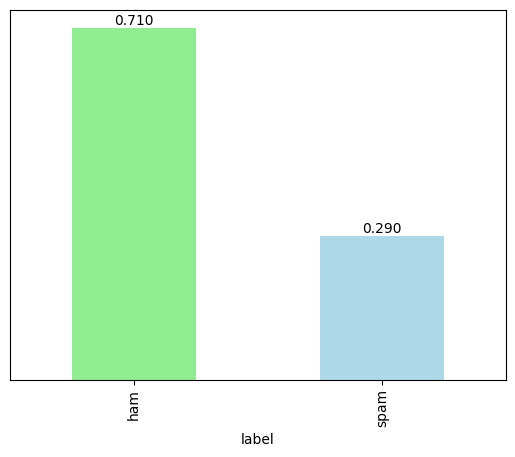

In [17]:
ax = (df['label'].value_counts()/df.shape[0]).plot(kind='bar',color=['lightgreen','lightblue'])
ax.set_yticks([])
[plt.bar_label(c,fmt='%.3f') for c in ax.containers]

the plot above represents the distribution of our target feature (spam or ham) so we can see that emails that are classified as Ham represent
3672 cases which is 70% of our data while Spam cases only covers ~ 30% . so basicly our data is umbalanced so our startegy will be the following :
* training the models with the default data no (oversampling or undersampling) and evaluating the performance of the model.
  if the model is doing having low performance metrics we will add a preprocessing layer for the data balancing
  else we will stick with the data 

## Data Processing class

In [18]:
class text_preprocessing():
    def __init__(self,df:pd.DataFrame):
        self.df = df
        self.Vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
        self.Encoder = LabelEncoder()
        
    def splitting_data(self):
        """
        Splitting the data into X(independent features) and y (target feature)
        """
        self.X = self.df.iloc[:,0]
        self.y = self.df.iloc[:,1]
        return self.X,self.y
        
    def encoding(self):
        """
        encoding the target Variable
        """
        self.y = self.Encoder.fit_transform(self.y)
        return self.y
        
    def test_train(self):
        """
        Splitting the data into train and test subsets
        """
        self.X_train,self.X_test,self.y_train,self.y_test = train_test_split(self.X,self.y,test_size=.3,stratify=self.y,random_state=42)
        return self.X_train,self.X_test,self.y_train,self.y_test
        
    def Vectorization(self):
        """
        Transforming the text data into numerical representation using the TF-IDF matrix
        """
        self.X_train_vect = self.Vectorizer.fit_transform(self.X_train)
        self.X_test_vect = self.Vectorizer.transform(self.X_test)
        return self.X_train_vect,self.X_test_vect
    
    def operation(self):
        """
        the workdlow of the operations 
        """
        self.splitting_data()
        self.encoding()
        self.test_train()
        X_train , X_test = self.Vectorization()
        return X_train , X_test ,self.y_train,self.y_test
        

preprocessing = text_preprocessing(df)
X_train , X_test , y_train , y_test = preprocessing.operation()

In [19]:
print("x_train :",X_train.shape[0])
print("y_train :",y_train.shape[0])
print("x_test :",X_test.shape[0])
print("y_test :",y_test.shape[0])

x_train : 3619
y_train : 3619
x_test : 1552
y_test : 1552


## Buiding our two baseline models

In [20]:
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1102
           1       0.85      0.95      0.90       450

    accuracy                           0.94      1552
   macro avg       0.91      0.94      0.93      1552
weighted avg       0.94      0.94      0.94      1552



Text(0.5, 23.52222222222222, 'predicted data')

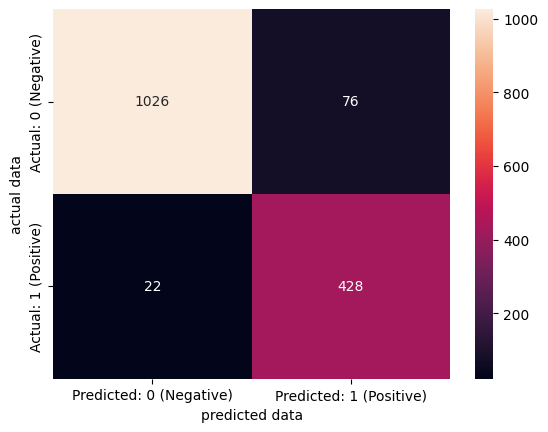

In [21]:
base_model = MultinomialNB()
base_model.fit(X_train,y_train)
y_hat = base_model.predict(X_test)


acc = accuracy_score(y_test,y_hat)
class_report = classification_report(y_test,y_hat)
print(class_report)
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,fmt="d",
           xticklabels=['Predicted: 0 (Negative)', 'Predicted: 1 (Positive)'],
    yticklabels=['Actual: 0 (Negative)', 'Actual: 1 (Positive)'])
plt.ylabel("actual data")
plt.xlabel("predicted data")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1102
           1       0.96      0.95      0.96       450

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552



Text(0.5, 23.52222222222222, 'predicted data')

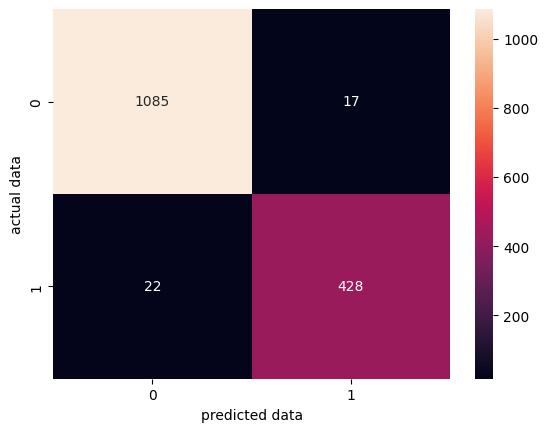

In [22]:
base_model_1 = LogisticRegression()
base_model_1.fit(X_train,y_train)
y_hat = base_model_1.predict(X_test)

acc = accuracy_score(y_test,y_hat)
class_report = classification_report(y_test,y_hat)
print(class_report)
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,fmt="d")
plt.ylabel("actual data")
plt.xlabel("predicted data")

In [23]:
LG_score = cross_val_score(base_model_1,X_train,y_train,cv=5,scoring="f1")
NB_score = cross_val_score(base_model,X_train,y_train,cv=5,scoring="f1")
print("the Logistic regression f1 score :",round(LG_score.mean(),3) )
print("the Naive bayes f1 score :",round(NB_score.mean(),3) )


the Logistic regression f1 score : 0.948
the Naive bayes f1 score : 0.914


**<br>Accuracy:<br>**
Accuracy is a general metric used to evaluate the overall performance of a model. It represents the proportion of correctly classified instances among all observations.
In our experiment, both models achieved high accuracy scores (above 90%). However, the Logistic Regression model outperformed the Naive Bayes model by approximately 7%, indicating a better overall classification capability.

**<br>Precision:<br>**
Precision measures the model’s ability to correctly identify true positives among all predicted positives. In other words, it shows how “trustworthy” a positive prediction is.
In our experiment, the Logistic Regression model once again outperformed the Naive Bayes model, achieving a precision score of 96%, compared to 85% for Naive Bayes. This means the Logistic model makes fewer false alarms (false positives).

**<br>Recall:<br>**
Recall (or sensitivity) measures how many actual positives the model was able to correctly identify. It is especially important in scenarios where false negatives are costly (e.g., detecting diseases, fraud, or spam).
In our case, the Logistic Regression model also slightly outperformed the Naive Bayes model, with a difference of less than 6%, demonstrating stronger capability in capturing true positives.

## Email classification with BIRT using the transfor learning technique

**BERT and Transfer Learning:**<br>
BERT (Bidirectional Encoder Representations from Transformers) is a revolutionary NLP model developed by Google that leverages the power of transfer learning. Instead of training a language model from scratch for each specific task, BERT is first pre-trained on massive text corpora like Wikipedia using two unsupervised objectives — Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). This pre-training allows BERT to learn deep contextual relationships between words. Then, through fine-tuning, we adapt the pre-trained model to a downstream task (such as sentiment analysis, text classification, or named entity recognition) using a much smaller labeled dataset. This approach drastically reduces computational cost and improves performance, as the model already “understands” language structure. In short, BERT and transfer learning brought a paradigm shift in NLP — from building task-specific models to reusing and refining a single, deeply trained language model.



## Loading the Pre-Trained BERT Model and Tokenizer